Questions for TA:

OLS results coming back nan.

How to plot statsmodel OLS results

In [158]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import json
import os
import statsmodels.api as sm
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Problem background

In [159]:
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

### Importing data and creating subsets by gender

In [160]:
url='http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'
allmales = {}
allfemales = {}

allmales['all'] = pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white'] = pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black'] = pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic'] = pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian'] = pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

###Data exploration

In [161]:
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(allmales['all'], alpha=0.2, figsize=(10, 10), diagonal='kde')
# allmales['all'].head(10)

###Data cleanup

In [162]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [163]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


###Comparing the medians of the gender and race subsets

In [164]:
m_all_med = allmales['all']['Median income'][1]
m_white_med = allmales['white']['Median income'][1]
m_black_med = allmales['black']['Median income'][1]
m_hispanic_med = allmales['hispanic']['Median income'][1]
m_asian_med = allmales['asian']['Median income'][1]
print [m_all_med, m_white_med, m_black_med, m_hispanic_med, m_asian_med]

m_all = allmales['all']['Median income'].values
m_white = allmales['white']['Median income'].values
m_black = allmales['black']['Median income'].values
m_hispanic = allmales['hispanic']['Median income'].values
m_asian = allmales['asian']['Median income'].values

f_all_med = allfemales['all']['Median income'][1]
f_white_med = allfemales['white']['Median income'][1]
f_black_med = allfemales['black']['Median income'][1]
f_hispanic_med = allfemales['hispanic']['Median income'][1]
f_asian_med = allfemales['asian']['Median income'][1]
print [f_all_med, f_white_med, f_black_med, f_hispanic_med, f_asian_med]

f_all = allfemales['all']['Median income'].values
f_white = allfemales['white']['Median income'].values
f_black = allfemales['black']['Median income'].values
f_hispanic = allfemales['hispanic']['Median income'].values
f_asian = allfemales['asian']['Median income'].values

[35228.0, 40122.0, 24855.0, 25411.0, 40153.0]
[22063.0, 23780.0, 20044.0, 17762.0, 24840.0]


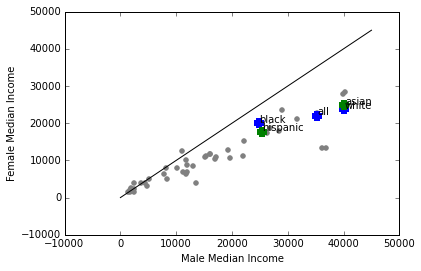

In [165]:
x = numpy.arange(0,45000,1)
pl.plot(x, x, color='black')

pl.xlabel('Male Median Income')
pl.ylabel('Female Median Income')

pl.scatter(m_all, f_all, color='grey')

pl.plot(m_all_med, f_all_med, '+', color='blue', mew=10)
pl.annotate('all', xy=(m_all_med, f_all_med), xytext=(m_all_med+200, f_all_med+200))

pl.plot(m_white_med, f_white_med, '+', color='blue', mew=10)
pl.annotate('white', xy=(m_white_med, f_white_med), xytext=(m_white_med+200, f_white_med+200))

pl.plot(m_black_med, f_black_med, '+', color='blue', mew=10)
pl.annotate('black', xy=(m_black_med, f_black_med), xytext=(m_black_med+200, f_black_med+200))

pl.plot(m_hispanic_med, f_hispanic_med, '+', color='green', mew=10)
pl.annotate('hispanic', xy=(m_hispanic_med, f_hispanic_med), xytext=(m_hispanic_med+200, f_hispanic_med+200))

pl.plot(m_asian_med, f_asian_med, '+', color='green', mew=10)
pl.annotate('asian', xy=(m_asian_med, f_asian_med), xytext=(m_asian_med+200, f_asian_med+200))

###Linear regression

####Statsmodel OLS

In [166]:
x = sm.add_constant(m_all)
# print x
mmod = sm.OLS(f_all,x).fit()
print mmod.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Oct 2015   Prob (F-statistic):                nan
Time:                        11:24:48   Log-Likelihood:                    nan
No. Observations:                  49   AIC:                               nan
Df Residuals:                      49   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1                nan        nan        nan        n

In [171]:
# plt.figure();

# In [33]: plt.plot(x, y, 'o', x, y_true, 'b-');

# In [34]: prstd, iv_l, iv_u = wls_prediction_std(res);

# In [35]: plt.plot(x, res.fittedvalues, 'r--.');

# In [36]: plt.plot(x, iv_u, 'r--');

# In [37]: plt.plot(x, iv_l, 'r--');

# In [38]: plt.title('blue: true,   red: OLS');

# http://statsmodels.sourceforge.net/devel/examples/generated/example_ols.html

####Numpy option

In [ ]:
# pl.plot(newx,np.poly1d(np.ployfit(allmales['all']['Median income'][:],allfemales['all']['Median income'][:],1))(newx)

####Analytical method

In [173]:
cor = stats.spearmanr(m_all, f_all)
# m_all.std()/f_all.std()
beta1 = cor[0]*f_all.std()/m_all.std()
beta0 = f_all.mean()-beta1*m_all.mean()

####Plot comparison

####Line fit by race

In [ ]:
all_males=np.ma.array(np.concatenate([m_all,
                                      m_white,
                                      m_black,
                                      m_hispanic,
                                      m_asian]).flatten())

all_females=np.ma.array(np.concatenate([f_all,
                                      f_white,
                                      f_black,
                                      f_hispanic,
                                      f_asian]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask